<a href="https://colab.research.google.com/github/Codewithkaint/LearnGit/blob/main/NumberImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


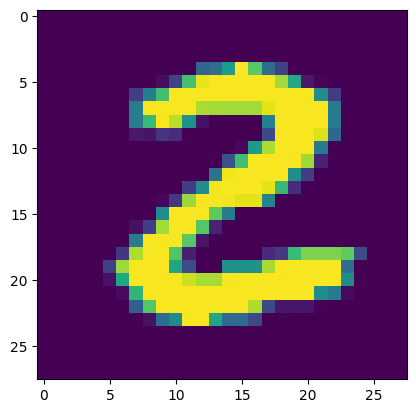

2


In [7]:
plt.imshow(X_train[25])
plt.show()

print(Y_train[25])

In [8]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2867 - accuracy: 0.9163
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1375 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1013 - accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0818 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [14]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy," ",loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0972 - accuracy: 0.9739
0.9739000201225281   0.09715569764375687


In [15]:
print(X_test.shape)

(10000, 28, 28)


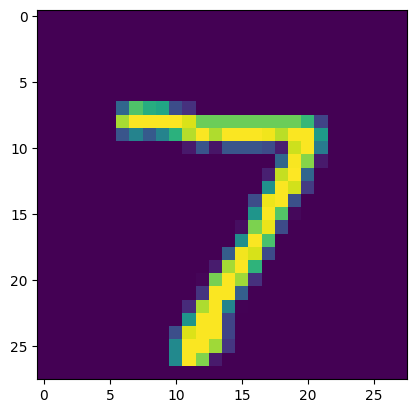

In [16]:
plt.imshow(X_test[0])
plt.show()

In [17]:
Y_pred=model.predict(X_test)
print(Y_pred.shape)

313/313 [==============================] - 1s 3ms/step
(10000, 10)


In [18]:
print(Y_pred)

[[3.3326862e-05 2.8116065e-01 2.8932374e-02 ... 9.9999237e-01
  9.3550920e-02 4.3349180e-01]
 [2.8507255e-05 7.4928463e-01 1.0000000e+00 ... 8.8446686e-06
  1.2840462e-01 4.8996344e-06]
 [6.0087117e-05 9.9938869e-01 7.3480181e-02 ... 7.0574671e-01
  3.2271165e-01 1.3206500e-02]
 ...
 [1.2407743e-07 3.3790461e-06 3.3661244e-08 ... 6.9192529e-01
  3.0554141e-04 9.8196924e-01]
 [5.4612397e-06 3.3444054e-02 4.6241901e-08 ... 4.7796983e-02
  2.2088138e-02 1.4030580e-02]
 [1.5791994e-02 9.5428135e-08 2.8573148e-05 ... 5.8702581e-09
  1.1538909e-03 2.4511024e-07]]


In [19]:
predictedLabel=[np.argmax(i) for i in Y_pred]
print(predictedLabel)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 9, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [20]:
cofMat=confusion_matrix(Y_test,predictedLabel)

In [21]:
print(cofMat)

tf.Tensor(
[[ 962    0    3    3    0    2    3    1    2    4]
 [   0 1117    2    3    0    1    3    0    9    0]
 [   2    2  999   10    1    0    2    5   11    0]
 [   0    0    4  986    0    3    0    5    7    5]
 [   1    0    2    1  960    1    0    2    0   15]
 [   2    0    1   14    2  859    3    1    7    3]
 [   4    1    1    1    3    5  938    0    2    3]
 [   0    6   10    4    1    0    0  991    4   12]
 [   1    0    3    4    5    7    0    2  943    9]
 [   1    3    0    2   12    2    0    4    1  984]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

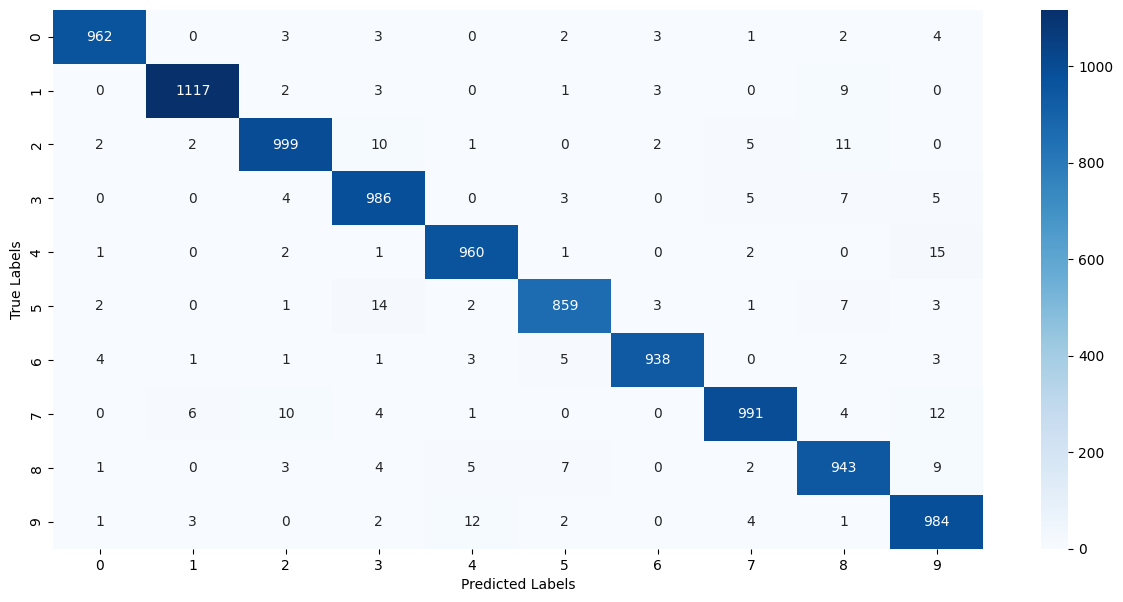

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(cofMat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Path of input image for Prediction : /content/three.png


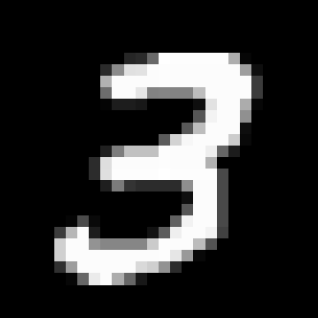

1/1 [==============================] - 0s 18ms/step
The Handwritten Digit is recognised as  3


In [25]:
inputImage=input('Path of input image for Prediction : ')
inputImage=cv2.imread(inputImage)
cv2_imshow(inputImage)
greyScale=cv2.cvtColor(inputImage,cv2.COLOR_RGB2GRAY)
inputImage=cv2.resize(greyScale,(28,28))
inputImage=inputImage/255
inputImage=np.reshape(inputImage,[1,28,28])
inputImage=model.predict(inputImage)
inputImage=np.argmax(inputImage)
print('The Handwritten Digit is recognised as ', inputImage)
